In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
%matplotlib inline

In [17]:
def parse(x):
  return datetime.strptime(x, '%Y %m %d %H')

df = pd.read_csv('pm25.csv', parse_dates=[['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
df.drop('No', axis=1,inplace=True)

df.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
df.index.name = 'date'
df['pollution'].fillna(0, inplace=True)

#drop the first 24 hours
df = df[24:]
df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [19]:
df = df.drop(columns='wnd_dir')
df.head()

,pollution,dew,temp,press,wnd_spd,snow,rain
date,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0


In [0]:
split_size = int(0.8*len(df))
train = df[:split_size]
valid = df[split_size:]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd64b53f28>,
      dtype=object)

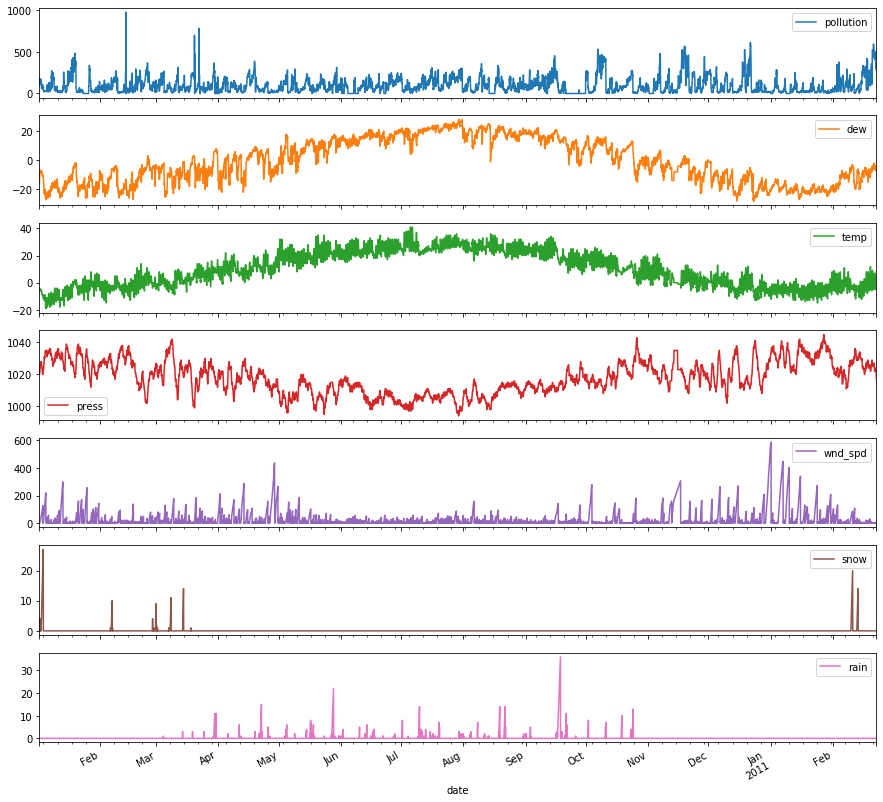

In [24]:
df[:10000].plot(subplots=True, figsize=(15,15))

In [25]:
model = VAR(endog=train)
model_fit = model.fit(maxlags=15)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [26]:
prediction = model_fit.forecast(model_fit.y,steps=len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [27]:
model_fit.fittedvalues.head()

,pollution,dew,temp,press,wnd_spd,snow,rain
date,,,,,,,
2010-01-02 15:00:00,157.413064,-9.258852,-4.479807,1024.952613,31.976703,0.014035,-0.001089
2010-01-02 16:00:00,155.217990,-9.103230,-4.687925,1025.037268,34.274341,0.057811,0.010240
2010-01-02 17:00:00,152.278313,-9.300760,-4.767183,1026.275153,37.766243,0.057945,0.004682
2010-01-02 18:00:00,158.979122,-8.367484,-4.948779,1027.606255,39.801265,0.008043,-0.000411
2010-01-02 19:00:00,164.615017,-8.389360,-4.559935,1027.635250,42.659382,0.026904,-0.023835


In [29]:
df_forecast = pd.DataFrame(prediction, index=df.index[split_size:], columns=df.columns)
df_forecast.head()

,pollution,dew,temp,press,wnd_spd,snow,rain
date,,,,,,,
2014-01-01 00:00:00,23.277894,-19.969694,6.412687,1014.014063,133.818735,-0.010594,-0.060843
2014-01-01 01:00:00,21.228716,-19.778695,5.736539,1014.058935,128.761329,-0.012913,-0.103024
2014-01-01 02:00:00,19.634703,-19.494598,4.956139,1014.158910,123.759110,-0.020940,-0.160420
2014-01-01 03:00:00,18.439285,-19.087605,4.506052,1014.359116,118.796804,-0.024177,-0.167981
2014-01-01 04:00:00,19.852632,-18.713767,4.324056,1014.662563,113.962974,-0.025114,-0.191696


In [31]:
cols = df.columns
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(df_forecast[i], valid[i])))

rmse value for pollution is :  93.62012501029305
rmse value for dew is :  13.08229187484093
rmse value for temp is :  11.01007224996844
rmse value for press is :  9.25939543046966
rmse value for wnd_spd is :  44.85073038794289
rmse value for snow is :  0.7045787903337586
rmse value for rain is :  1.0703218724022083


In [33]:
#make final predictions
model = VAR(endog=df)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[ 1.18539659e+01 -2.09622601e+01 -3.29801714e+00  1.03413547e+03
   2.38184279e+02  2.74231482e-02  1.27155257e-02]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [0]:
model_fit.y.shape

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


(52260, 14)